Name: Josemaria Macedo Carrillo\
Ttile: Land Matrix Data Exploration\
Created: 06/22/23\
Last modified: 07/20/23\
DSI

The purpose of this notebook is to analyze data on Ukrainian agricultural
exports. The main data sources are the Black Sea Grain Initiative (BSGI) of the United
Nations and Panjiva, a website that has trade data for different countries
including Ukraine.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
from utils.get_data import get_data
from utils.record_linkage import record_linkage
from utils.plot import cargo_grouping, plot_line, plot_crops
from utils.clean_data import PRODUCTS_VAL, clean_column

pd.set_option('display.float_format', lambda x: '%.4f' % x)

Import cleaned data from Panjiva and the Black Sea Grain Initiative
(BSGI) with all the necessary columns for further analysis.

In [2]:
ig = get_data("ig")
bsgi = get_data("bsgi")
panjiva = get_data("panjiva")

In [3]:
panjiva.columns
len(panjiva["shipper"].unique())
len(panjiva["company_searched"].unique())

clean_column(panjiva, "shipment_origin")
panjiva = panjiva.loc[panjiva.loc[:, "shipment_origin"] == "ukraine"]

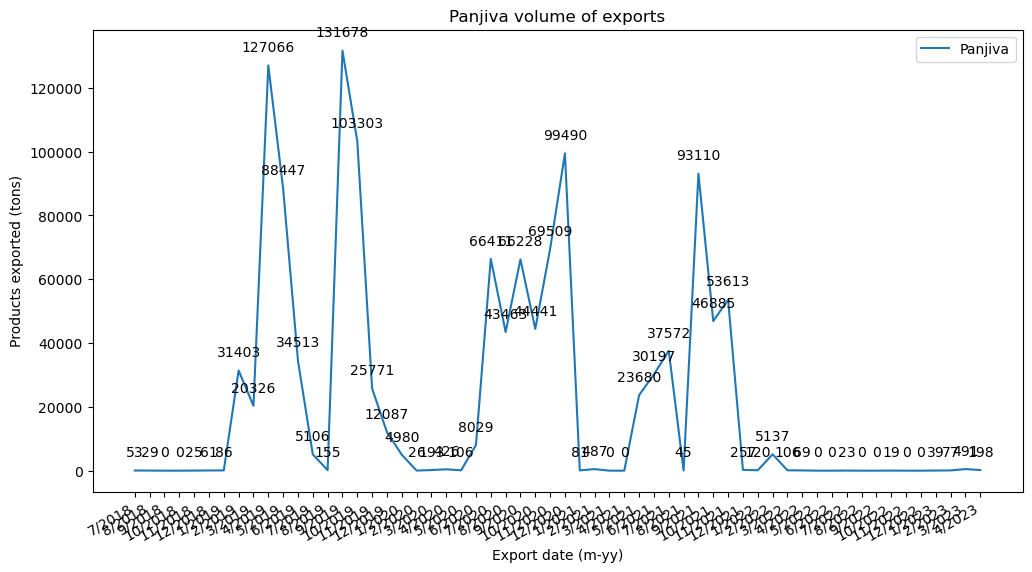

In [4]:
panjiva_g = cargo_grouping(panjiva, ["year", "month"], ["weight_ton"], ["year", "month"], True)
panjiva_g["date"] = panjiva_g["month"].astype(str) + "/" + panjiva_g["year"].astype(str)
plot_line(panjiva_g["date"], [panjiva_g["weight_ton"]], ["Panjiva"], "Panjiva volume of exports", "Export date (m-yy)", "Products exported (tons)", False)

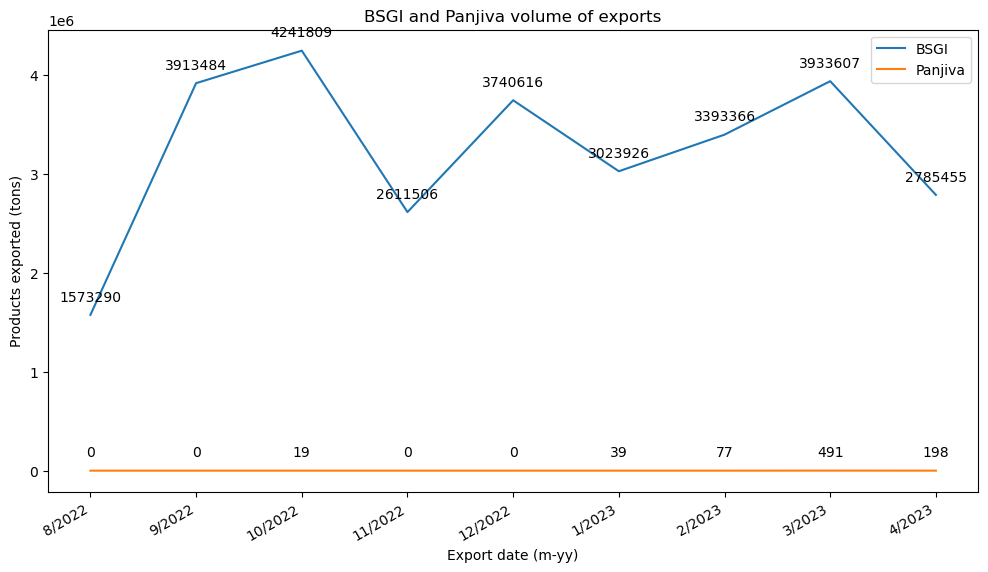

In [6]:
bsgi_g = cargo_grouping(bsgi, ["year", "month"], ["weight_ton"], ["year", "month"], True)
bsgi_g["date"] = bsgi_g["month"].astype(str) + "/" + bsgi_g["year"].astype(str)

final = bsgi_g.merge(panjiva_g, on="date", suffixes=("_bsgi", "_panjiva"))
plot_line(final["date"], [final["weight_ton_bsgi"], final["weight_ton_panjiva"]], ["BSGI", "Panjiva"], "BSGI and Panjiva volume of exports", "Export date (m-yy)", "Products exported (tons)", False)